In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet(r"C:\Users\fatih\Downloads\Call_Report_BankData_852218.parquet", engine='fastparquet')
df.head()

,Item,IDRSSD,Value,Date,CValue,schedule,schedule.label,Label1clean,Label2clean,Label3clean,...,line2,line3,line4,line5,line6,line7,column.label,type,balance,Status
0,RCFA3792,852218.0,1.644990e+11,2014-03-31,1.644990e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
1,RCFA3792,852218.0,1.683120e+11,2014-06-30,3.813000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
2,RCFA3792,852218.0,1.705590e+11,2014-09-30,2.247000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
3,RCFA3792,852218.0,1.733280e+11,2014-12-31,2.769000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
4,RCFA3792,852218.0,1.781850e+11,2015-03-31,1.781850e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main


In [3]:
call_report_bankdata = df
df2 = call_report_bankdata.pivot_table(index='Date', columns=['schedule','labelStringclean'], values='CValue', aggfunc='sum')
df2.head()

schedule                             ENT                 \
labelStringclean FDIC certificate number Reporting date   
Date                                                      
2001-03-31                           NaN     20010331.0   
2001-06-30                           NaN          299.0   
2001-09-30                           NaN          300.0   
2001-12-31                           NaN          301.0   
2002-03-31                           NaN     20020331.0   

schedule                                             RC  \
labelStringclean Accumulated other comprehensive income   
Date                                                      
2001-03-31                                 -284000000.0   
2001-06-30                                 -388000000.0   
2001-09-30                                  921000000.0   
2001-12-31                                 -621000000.0   
2002-03-31                                 -877000000.0   

schedule                                             \
labelStringclean Available-for-sale debt securities   
Date                                                  
2001-03-31                             6.036100e+10   
2001-06-30                             5.420000e+08   
2001-09-30                            -2.316000e+09   
2001-12-31                            -5.671000e+09   
2002-03-31                             5.615900e+10   

schedule                                                                       \
labelStringclean Bank's fiscal year-end date (report the date in MMDD format)   
Date                                                                            
2001-03-31                                                      NaN             
2001-06-30                                                      NaN             
2001-09-30                                                      NaN             
2001-12-31                                                      NaN             
2002-03-31                                                      NaN             

schedule                        \
labelStringclean  Common stock   
Date                             
2001-03-31        1.211000e+09   
2001-06-30        0.000000e+00   
2001-09-30        0.000000e+00   
2001-12-31        2.650000e+08   
2002-03-31        1.785000e+09   

schedule                                                                  \
labelStringclean Direct and indirect investments in real estate ventures   
Date                                                                       
2001-03-31                                                      NaN        
2001-06-30                                                      NaN        
2001-09-30                                                      NaN        
2001-12-31                                                      NaN        
2002-03-31                                                      NaN        

schedule                                                                                       \
labelStringclean Equity securities with readily determinable fair values not held for trading   
Date                                                                                            
2001-03-31                                                      NaN                             
2001-06-30                                                      NaN                             
2001-09-30                                                      NaN                             
2001-12-31                                                      NaN                             
2002-03-31                                                      NaN                             

schedule                                                      \
labelStringclean Federal funds purchased in domestic offices   
Date                                                           
2001-03-31                                               NaN   
2001-06-30                                       

In [4]:
df2.isnull().sum().sort_values(ascending=False).sort_values()

schedule  labelStringclean                                                                                                                                  
RI        Commodity and other exposures                                                                                                                          0
RCB       Fair value                                                                                                                                             0
RIBII     Provisions for credit losses                                                                                                                           0
RCB       Home equity lines                                                                                                                                      0
RIBII     Balance most recently reported for the December 31, 2022, Reports of Condition and Income (i.e., after adjustments from amended Reports of Income)     0
                            

In [5]:
is_null = pd.DataFrame(df2.isnull().sum(), columns = ['isnull']).sort_values(by="isnull", ascending=False)
is_null

isnull
schedule labelStringclean                                          
RCRI     Distributions and discretionary bonus payments ...      88
RCB      Unallocated portfolio layer fair value hedge ba...      88
RCRI     Eligible retained income                                88
RCM      Estimated number of international remittance tr...      87
         Estimated number of international remittance tr...      87
...                                                             ...
RCT      Total gross fiduciary and related services income        0
RCD      Securities issued by states and political subdi...       0
         Total trading assets                                     0
         Total trading liabilities                                0
RI       Commodity and other exposures                            0

[943 rows x 1 columns]

In [6]:
percentage_null = pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

percentage_null
schedule labelStringclean                                                   
RCRI     Distributions and discretionary bonus payments ...        98.876404
RCB      Unallocated portfolio layer fair value hedge ba...        98.876404
RCRI     Eligible retained income                                  98.876404
RCM      Estimated number of international remittance tr...        97.752809
         Estimated number of international remittance tr...        97.752809
RIE      Effect of adoption of Current Expected Credit L...        96.629213
         Initial allowances for credit losses recognized...        96.629213
         Effect of adoption of current expected credit l...        96.629213
RCRI     Leverage ratio                                            95.505618
RCCI     Other loans                                               95.505618
RCRI     Common equity tier 1 capital ratio                        95.505618
         Total capital ratio                                       95.505618
         Tier 1 capital ratio                                      95.505618
RCCII    "Loans to finance agricultural production and o...        94.382022
         "Loans secured by nonfarm nonresidential proper...        94.382022

In [7]:
summary_null = pd.concat([is_null, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,schedule,labelStringclean,isnull,percentage_null
0,RCRI,Distributions and discretionary bonus payments...,88,98.876404
1,RCB,Unallocated portfolio layer fair value hedge b...,88,98.876404
2,RCRI,Eligible retained income,88,98.876404
3,RCM,Estimated number of international remittance t...,87,97.752809
4,RCM,Estimated number of international remittance t...,87,97.752809
...,...,...,...,...
938,RCT,Total gross fiduciary and related services income,0,0.000000
939,RCD,Securities issued by states and political subd...,0,0.000000
940,RCD,Total trading assets,0,0.000000
941,RCD,Total trading liabilities,0,0.000000


In [8]:
def df_nans(df2, limit):
    missing = df2.isnull().sum()*100 / df2.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [9]:
df_nans(df2, 90)

schedule  labelStringclean                                                                                                                                                                                                                                          
RCB       Unallocated portfolio layer fair value hedge basis adjustments                                                                                                                                                                                                98.876404
RCCI      Other loans                                                                                                                                                                                                                                                   95.505618
RCCII     "Commercial and industrial loans" reported in Schedule RC-C, part I, item 4                                                                                                          

In [10]:
df_nans(df2, 90).index

MultiIndex([(  'RCB', ...),
            ( 'RCCI', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            (  'RCL', ...),
            (  'RCM', ...),
            (  'RCM', ...),
            (  'RCO', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            (  'RIE', ...),
            (  'RIE', ...),
            (  'RIE', ...)],
           names=['schedule', 'labelStringclean'])

In [11]:
df_nans(df2, 80).values

array([83.14606742, 80.8988764 , 98.87640449, 85.39325843, 95.50561798,
       85.39325843, 89.88764045, 94.38202247, 94.38202247, 94.38202247,
       94.38202247, 92.13483146, 92.13483146, 92.13483146, 92.13483146,
       92.13483146, 92.13483146, 92.13483146, 92.13483146, 92.13483146,
       85.39325843, 94.38202247, 83.14606742, 82.02247191, 84.26966292,
       97.75280899, 97.75280899, 84.26966292, 89.88764045, 89.88764045,
       89.88764045, 89.88764045, 89.88764045, 89.88764045, 89.88764045,
       91.01123596, 80.8988764 , 80.8988764 , 80.8988764 , 95.50561798,
       98.87640449, 85.39325843, 85.39325843, 98.87640449, 85.39325843,
       85.39325843, 85.39325843, 85.39325843, 85.39325843, 95.50561798,
       80.8988764 , 95.50561798, 95.50561798, 85.39325843, 85.39325843,
       85.39325843, 84.26966292, 84.26966292, 84.26966292, 84.26966292,
       84.26966292, 84.26966292, 84.26966292, 84.26966292, 84.26966292,
       84.26966292, 84.26966292, 84.26966292, 84.26966292, 84.26

In [12]:
drop_columns = df_nans(df2, 80).index
drop_columns

MultiIndex([(   'RC', ...),
            (   'RC', ...),
            (  'RCB', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ...
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            (  'RID', ...),
            (  'RIE', ...),
            (  'RIE', ...),
            (  'RIE', ...)],
           names=['schedule', 'labelStringclean'], length=103)

In [13]:
df2.drop(drop_columns, axis=1, inplace=True)

In [14]:
df2.shape

(89, 840)

In [15]:
percentage_null = pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

percentage_null
schedule labelStringclean                                                   
RCEI     Total reciprocal deposits (as of the report date)         78.651685
RCS      Maximum amount of credit exposure arising from ...        77.528090
RCP      Repurchases and indemnifications of 1-4 family ...        77.528090
RCV      Total assets of asset-backed commercial paper (...        77.528090
         Securities not held for trading                           77.528090
RCB      Structured financial products                             77.528090
RCV      Other borrowed money                                      77.528090
RCB      U.S Government agency and sponsored agency obli...        77.528090
RCV      Other assets                                              77.528090
         Loans and leases held for investment, net of al...        77.528090
RCF      Interest-only strips receivable (not in the for...        77.528090
RCD      Structured financial products                             77.528090
RCP      Noninterest income for the quarter from the sal...        77.528090
         Retail originations during the quarter of 1-4 f...        77.528090
         Wholesale originations and purchases during the...        77.528090

In [16]:
df2["RC"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Data columns (total 39 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Accumulated other comprehensive income                                                          89 non-null     float64
 1   Available-for-sale debt securities                                                              89 non-null     float64
 2   Common stock                                                                                    89 non-null     float64
 3   Direct and indirect investments in real estate ventures                                         56 non-null     float64
 4   Equity securities with readily determinable fair values not held for trading                    21 non-null     float64
 5

In [17]:
df2["RC"][["Total assets"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total assets  89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [18]:
df2["RC"][["Total assets"]].skew()

labelStringclean
Total assets    1.569055
dtype: float64

In [19]:
df3 = df2["RC"] 
df3.head()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Direct and indirect investments in real estate ventures,Equity securities with readily determinable fair values not held for trading,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Intangible assets,...,Securities sold under agreements to repurchase,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-284000000.0,6.036100e+10,1.211000e+09,NaN,NaN,NaN,NaN,1.312140e+11,1.123940e+11,NaN,...,NaN,6.030000e+09,1.271400e+10,6.610180e+11,2.308700e+10,NaN,6.145920e+11,4.006230e+11,6.167300e+10,4.384700e+10
2001-06-30,-388000000.0,5.420000e+08,0.000000e+00,NaN,NaN,NaN,NaN,6.651000e+09,1.530000e+09,NaN,...,NaN,3.250000e+08,1.000000e+06,1.910100e+10,1.520000e+08,NaN,1.887100e+10,1.162500e+10,4.963000e+09,-4.236000e+09
2001-09-30,921000000.0,-2.316000e+09,0.000000e+00,NaN,NaN,NaN,NaN,8.873000e+09,4.800000e+08,NaN,...,NaN,0.000000e+00,0.000000e+00,4.035100e+10,1.577000e+09,NaN,3.714700e+10,2.255300e+10,-6.342000e+09,1.776000e+09
2001-12-31,-621000000.0,-5.671000e+09,2.650000e+08,NaN,NaN,NaN,NaN,1.336400e+10,5.967000e+09,NaN,...,NaN,3.112000e+09,3.305000e+09,1.093740e+11,8.457000e+09,NaN,9.245600e+10,1.030250e+11,8.017500e+10,5.082100e+10
2002-03-31,-877000000.0,5.615900e+10,1.785000e+09,NaN,NaN,1.298300e+10,1.901000e+09,1.519850e+11,1.199550e+11,NaN,...,8.261800e+10,9.679000e+09,1.630400e+10,8.321720e+11,3.376000e+10,NaN,7.644340e+11,5.413420e+11,1.526330e+11,9.409900e+10


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Data columns (total 39 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Accumulated other comprehensive income                                                          89 non-null     float64
 1   Available-for-sale debt securities                                                              89 non-null     float64
 2   Common stock                                                                                    89 non-null     float64
 3   Direct and indirect investments in real estate ventures                                         56 non-null     float64
 4   Equity securities with readily determinable fair values not held for trading                    21 non-null     float64
 5

In [21]:
df3.shape

(89, 39)

In [22]:
df3.isnull().sum().sum()

218

In [23]:
percentage_null = pd.DataFrame(df3.isnull().sum()/df3.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

,percentage_null
labelStringclean,
Intangible assets,77.528090
Equity securities with readily determinable fair values not held for trading,76.404494
Direct and indirect investments in real estate ventures,37.078652
Total equity capital,35.955056
Federal funds purchased in domestic offices,4.494382
Federal funds sold in domestic offices,4.494382
Securities purchased under agreements to resell,4.494382
Securities sold under agreements to repurchase,4.494382
Accumulated other comprehensive income,0.000000


In [24]:
df3.drop(columns = ["Intangible assets", "Equity securities with readily determinable fair values not held for trading"], inplace= True, axis= 1)

C:\Users\fatih\AppData\Local\Temp\ipykernel_21336\953097621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns = ["Intangible assets", "Equity securities with readily determinable fair values not held for trading"], inplace= True, axis= 1)


In [25]:
df3.isnull().sum().sum()

81

In [26]:
df3.fillna(df3.median(), inplace=True)

C:\Users\fatih\AppData\Local\Temp\ipykernel_21336\2874662160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(df3.median(), inplace=True)


In [27]:
df3.isnull().sum().sum()

0

In [28]:
df3.head()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Direct and indirect investments in real estate ventures,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Interest-bearing,Interest-bearing balances,...,Securities sold under agreements to repurchase,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-284000000.0,6.036100e+10,1.211000e+09,325500000.0,3.450000e+08,6.700000e+07,1.312140e+11,1.123940e+11,1.858800e+11,2.335900e+10,...,3.093000e+09,6.030000e+09,1.271400e+10,6.610180e+11,2.308700e+10,3.650000e+09,6.145920e+11,4.006230e+11,6.167300e+10,4.384700e+10
2001-06-30,-388000000.0,5.420000e+08,0.000000e+00,325500000.0,3.450000e+08,6.700000e+07,6.651000e+09,1.530000e+09,2.573000e+09,8.069000e+09,...,3.093000e+09,3.250000e+08,1.000000e+06,1.910100e+10,1.520000e+08,3.650000e+09,1.887100e+10,1.162500e+10,4.963000e+09,-4.236000e+09
2001-09-30,921000000.0,-2.316000e+09,0.000000e+00,325500000.0,3.450000e+08,6.700000e+07,8.873000e+09,4.800000e+08,9.770000e+08,2.586000e+09,...,3.093000e+09,0.000000e+00,0.000000e+00,4.035100e+10,1.577000e+09,3.650000e+09,3.714700e+10,2.255300e+10,-6.342000e+09,1.776000e+09
2001-12-31,-621000000.0,-5.671000e+09,2.650000e+08,325500000.0,3.450000e+08,6.700000e+07,1.336400e+10,5.967000e+09,1.309500e+10,-2.151900e+10,...,3.093000e+09,3.112000e+09,3.305000e+09,1.093740e+11,8.457000e+09,3.650000e+09,9.245600e+10,1.030250e+11,8.017500e+10,5.082100e+10
2002-03-31,-877000000.0,5.615900e+10,1.785000e+09,325500000.0,1.298300e+10,1.901000e+09,1.519850e+11,1.199550e+11,1.986320e+11,9.189000e+09,...,8.261800e+10,9.679000e+09,1.630400e+10,8.321720e+11,3.376000e+10,3.650000e+09,7.644340e+11,5.413420e+11,1.526330e+11,9.409900e+10


In [29]:
df3.select_dtypes("object")

labelStringclean
Date
2001-03-31
2001-06-30
2001-09-30
2001-12-31
2002-03-31
...
2022-03-31
2022-06-30
2022-09-30


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Özellikler ve hedef değişkeni belirleyin
X = df3.drop('Total assets', axis=1)
y = df3['Total assets']

# Veriyi eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regresyon modelini tanımlayın
ridge = Ridge(alpha=1.0)

# Modeli eğitim verileriyle eğitin
ridge.fit(X_train, y_train)

# Test verilerini tahmin edin
y_pred = ridge.predict(X_test)

# Performansı değerlendirin
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.586773816045071e+20


In [36]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Özellikler ve hedef değişkeni belirleyin
X = df3.drop('Total assets', axis=1)
y = df3['Total assets']

# Veriyi eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı alpha değerlerini belirleyin
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# RidgeCV modelini tanımlayın
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Modeli eğitim verileriyle eğitin
ridge_cv.fit(X_train, y_train)

# En iyi alpha değerini yazdırın
print("En iyi alpha değeri: ", ridge_cv.alpha_)

# Test verilerini tahmin edin
y_pred = ridge_cv.predict(X_test)

# Performansı değerlendirin
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


En iyi alpha değeri:  0.01
Mean Squared Error: 1.5867731217006386e+20


In [37]:
# Modeli eğitim verileriyle eğitin
ridge_cv.fit(X_train, y_train)

# Eğitim verilerini tahmin edin
y_train_pred = ridge_cv.predict(X_train)

# Test verilerini tahmin edin
y_test_pred = ridge_cv.predict(X_test)

# Eğitim ve test hatalarını hesaplayın
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Eğitim Hatası: {train_error}')
print(f'Test Hatası: {test_error}')


Eğitim Hatası: 3.784693287844476e+18
Test Hatası: 1.5867731217006386e+20


In [38]:
importance = ridge_cv.coef_
for i,j in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {j}')


Feature: Accumulated other comprehensive income, Score: 652928772.0948423
Feature: Available-for-sale debt securities, Score: -0.004021147073290765
Feature: Common stock, Score: 652928770.4663649
Feature: Direct and indirect investments in real estate ventures, Score: 0.2518234277326382
Feature: Federal funds purchased in domestic offices, Score: -0.6638454196975274
Feature: Federal funds sold in domestic offices, Score: 0.05609049284141788
Feature: In domestic offices, Score: 193043212.07005608
Feature: In foreign offices, Edge and Agreement subsidiaries, and IBFs, Score: 193043212.0183078
Feature: Interest-bearing, Score: -193043212.4960764
Feature: Interest-bearing balances, Score: 0.0035868003425448824
Feature: Investments in unconsolidated subsidiaries and associated companies, Score: 0.04747372767676172
Feature: LESS: Allowance for loan and lease losses, Score: -76929956.78425054
Feature: Loans and leases held for investment, Score: 76929956.93517745
Feature: Loans and leases hel

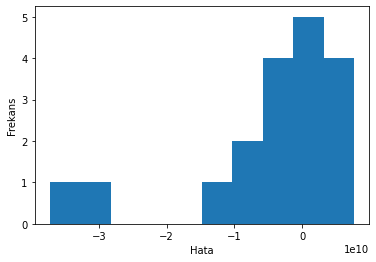

In [39]:
residuals = y_test - y_test_pred

plt.hist(residuals)
plt.xlabel('Hata')
plt.ylabel('Frekans')
plt.show()


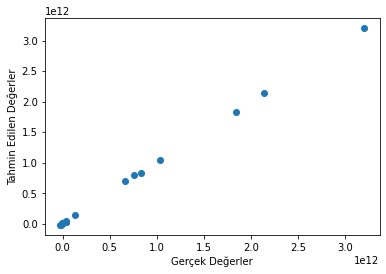

In [41]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.show()


In [42]:
# Özellikler ve önemlilikleri için DataFrame oluşturun
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': ridge_cv.coef_
})

# Önemliliklere göre azalan şekilde sıralayın
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# İlk 20 özelliği yazdırın
print(feature_importance.head(20))


                                              Feature    Importance
0              Accumulated other comprehensive income  6.529288e+08
29  Surplus (exclude all surplus related to prefer...  6.529288e+08
25                                  Retained earnings  6.529288e+08
2                                        Common stock  6.529288e+08
20                    Other equity capital components  2.365131e+08
6                                 In domestic offices  1.930432e+08
7   In foreign offices, Edge and Agreement subsidi...  1.930432e+08
23      Perpetual preferred stock and related surplus  1.600464e+08
12               Loans and leases held for investment  7.692996e+07
22                            Other real estate owned  2.076889e+00
15  Noncontrolling (minority) interests in consoli...  2.073128e+00
32                                  Total liabilities  1.148691e+00
33               Total liabilities and equity capital  2.951455e-01
3   Direct and indirect investments in real esta

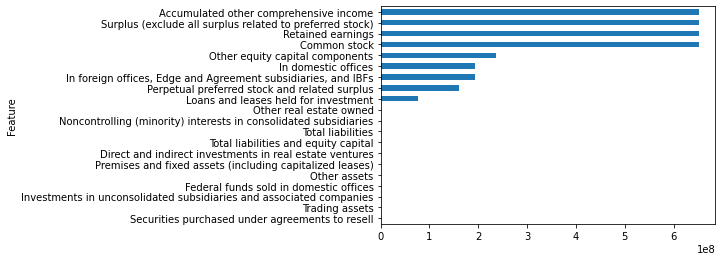

In [43]:
# Özellik önemliliklerini grafikte gösterin
feature_importance[:20].plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis()  # en önemli özellikleri en üstte göstermek için y eksenini ters çevirin
plt.show()
